In [ ]:
pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download aljarah/xAPI-Edu-Data

Dataset URL: https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data
License(s): CC-BY-SA-4.0
xAPI-Edu-Data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/xAPI-Edu-Data.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
df = pd.read_csv('/content/xAPI-Edu-Data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
df.tail()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L
479,F,Jordan,Jordan,MiddleSchool,G-08,A,History,S,Father,35,14,23,62,No,Bad,Above-7,L


In [ ]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [ ]:
df.isnull().sum()

,0
gender,0
NationalITy,0
PlaceofBirth,0
StageID,0
GradeID,0
SectionID,0
Topic,0
Semester,0
Relation,0
raisedhands,0


df.columns


In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [ ]:
df["Class"].value_counts()

,count
Class,
M,211
H,142
L,127


    Class
    M Medium performance (Continue)
    H High performance (Continue)
    L Low performance (Dropout risk)




In [ ]:
df['dropout'] = df['Class'].apply(lambda x: 1 if x == 'L' else 0)


In [ ]:
df.head(2)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,dropout
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0


Target Distribution(dropout)

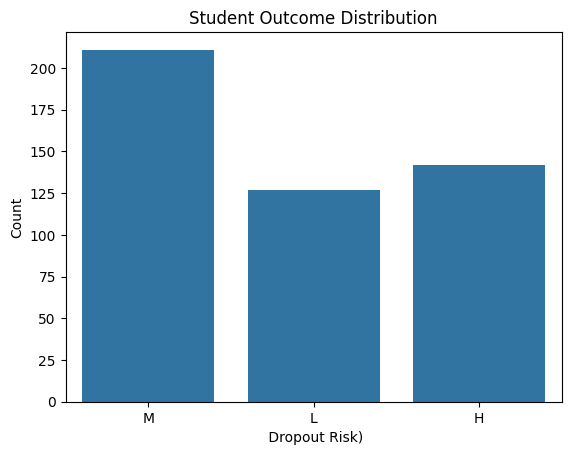

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Class', data=df)
plt.title("Student Outcome Distribution")
plt.xlabel(" Dropout Risk)")
plt.ylabel("Count")
plt.show()


In [ ]:
df["dropout"].value_counts()

,count
dropout,
0,353
1,127


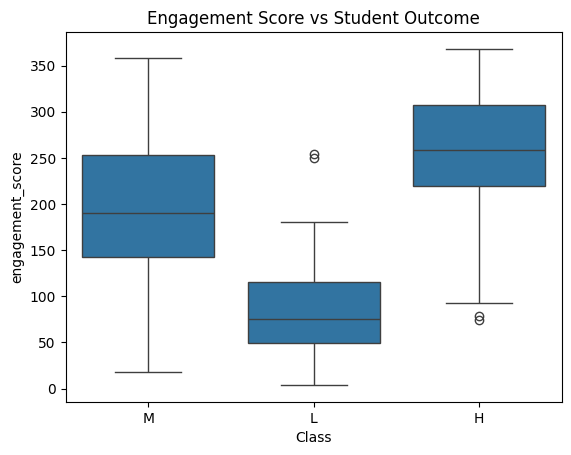

In [ ]:
df['engagement_score'] = (
    df['raisedhands'] +
    df['VisITedResources'] +
    df['AnnouncementsView'] +
    df['Discussion']
)

sns.boxplot(x='Class', y='engagement_score', data=df)
plt.title("Engagement Score vs Student Outcome")
plt.show()

students with less interaction  more at risk

Absences vs Dropout
Bar Chart

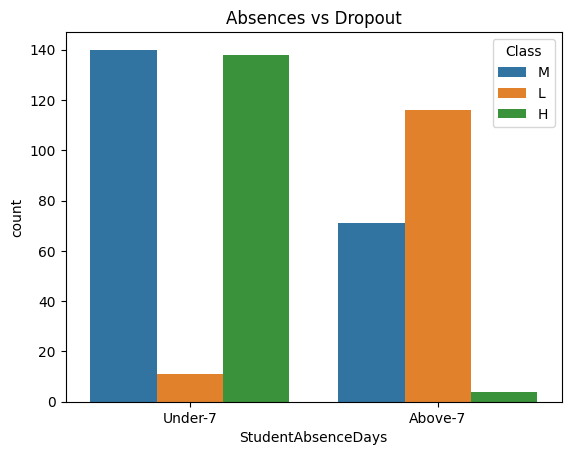

In [ ]:
sns.countplot(x='StudentAbsenceDays', hue='Class', data=df)
plt.title("Absences vs Dropout")
plt.show()


Above-7 absences huge dropout spike,Students who attend classes regularly are much more likely to continue.

# Individual Engagement Signals

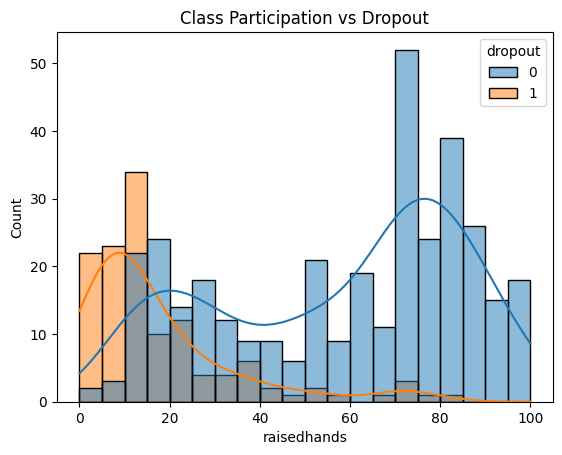

In [ ]:
sns.histplot(data=df, x='raisedhands', hue='dropout', bins=20, kde=True)
plt.title("Class Participation vs Dropout")
plt.show()


In [ ]:
df["class_participation"] = df["raisedhands"] + df["VisITedResources"]

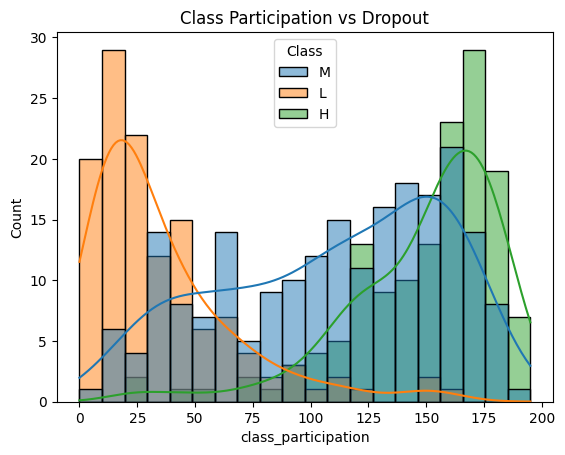

In [ ]:
# plot
sns.histplot(data=df, x='class_participation', hue='Class', bins=20, kde=True)
plt.title("Class Participation vs Dropout")
plt.show()

Visited Resources

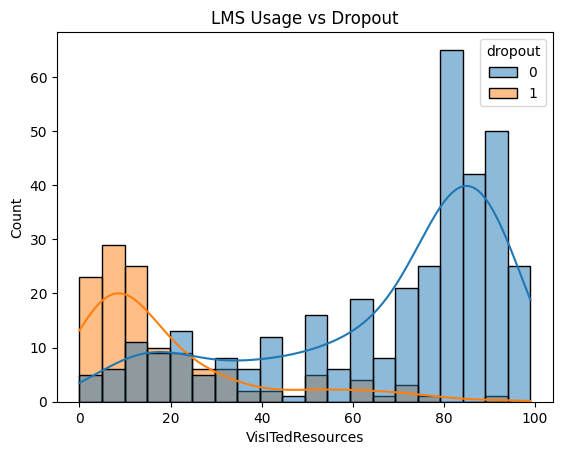

In [ ]:
sns.histplot(data=df, x='VisITedResources', hue='dropout', bins=20, kde=True)
plt.title("LMS Usage vs Dropout")
plt.show()

Parental Support Impact

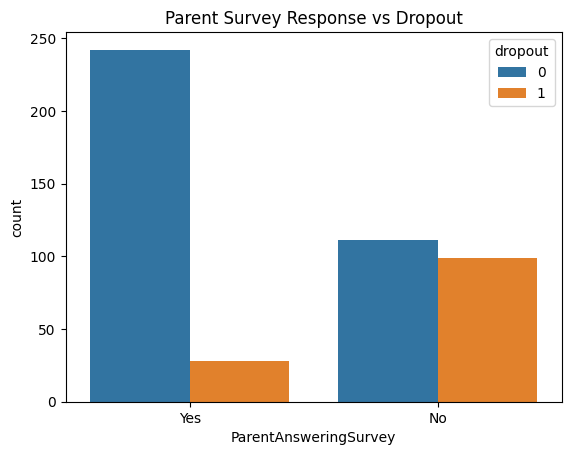

In [ ]:
sns.countplot(x='ParentAnsweringSurvey', hue='dropout', data=df)
plt.title("Parent Survey Response vs Dropout")
plt.show()


Parent Satisfaction

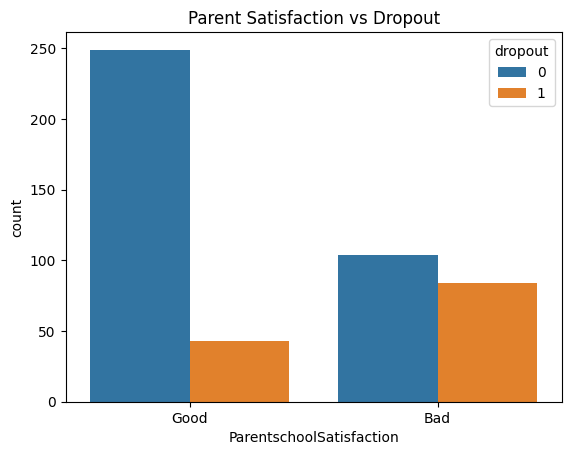

In [ ]:
sns.countplot(x='ParentschoolSatisfaction', hue='dropout', data=df)
plt.title("Parent Satisfaction vs Dropout")
plt.show()


Topic

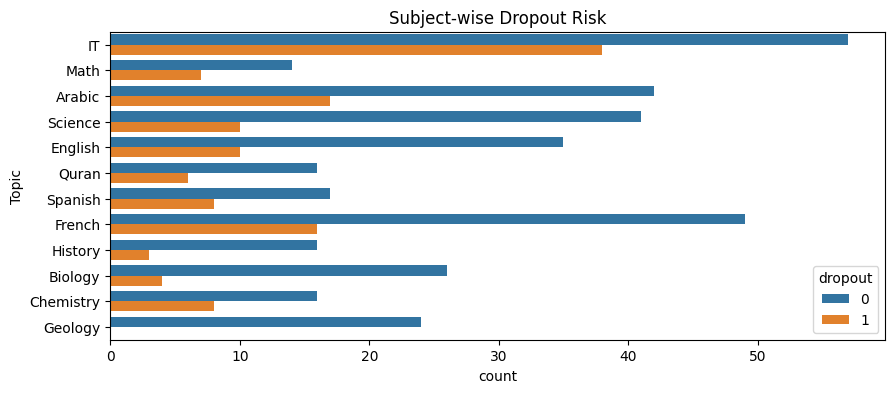

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(y='Topic', hue='dropout', data=df)
plt.title("Subject-wise Dropout Risk")
plt.show()


Gender

In [ ]:
df["gender"].value_counts()

,count
gender,
M,305
F,175


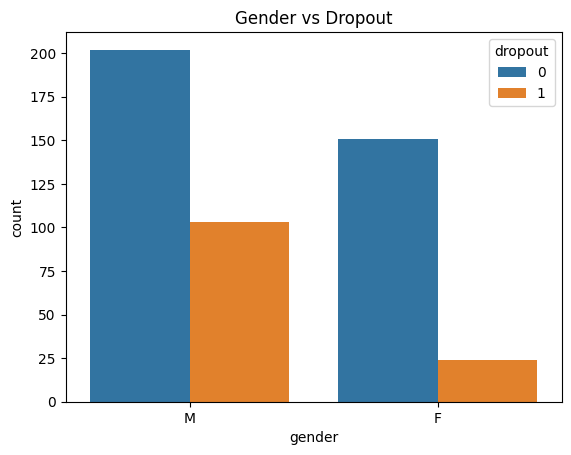

In [ ]:
sns.countplot(x='gender', hue='dropout', data=df)
plt.title("Gender vs Dropout")
plt.show()


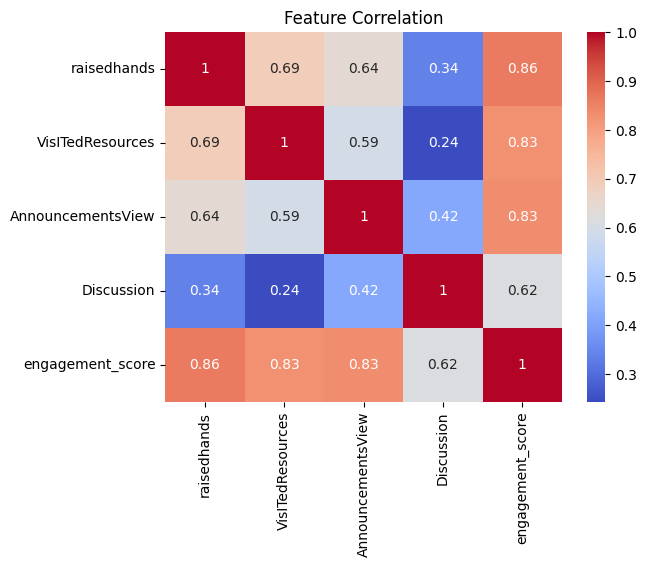

In [ ]:
numeric_cols = [
    'raisedhands', 'VisITedResources', # Corrected column name
    'AnnouncementsView', 'Discussion',
    'engagement_score'
]

sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [ ]:
df.head(2)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,dropout,engagement_score,class_participation
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0,53,31
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0,68,40


In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'dropout', 'engagement_score',
       'class_participation'],
      dtype='object')

Analysis summary:

Students who participate in one engagement activity usually participate in others.
This is expected and confirms behavioral consistency.

Visualization Analysis Summary
Exploratory analysis revealed that early engagement metrics such as raised hands, LMS resource usage, and discussion participation strongly differentiate students who later drop out. High absenteeism and low parental involvement further increase dropout risk. These patterns appear consistently across subjects and demographics, supporting the use of engagement-focused, explainable models for early intervention.

In [ ]:
df.drop(columns=[
    'raisedhands',
    'VisITedResources',
    'AnnouncementsView',
    'Discussion'
], inplace=True)


In [ ]:
df['StudentAbsenceDays'] = df['StudentAbsenceDays'].map({
    'Under-7': 0,
    'Above-7': 1
})


x y feature

In [ ]:
y = df['dropout']
X = df.drop(columns=['dropout'])


numeric features

In [ ]:
numeric_features = [
    'engagement_score',
    'class_participation',
    'StudentAbsenceDays'
]


In [ ]:
categorical_features = [
    'gender',
    'NationalITy',
    'PlaceofBirth',
    'StageID',
    'GradeID',
    'SectionID',
    'Topic',
    'Semester',
    'Relation',
    'ParentAnsweringSurvey',
    'ParentschoolSatisfaction'
]


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


train test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

LR_model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)


In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', LR_model)
])

# Re-create X after 'StudentAbsenceDays' has been mapped to numeric values
y = df['dropout']
X = df.drop(columns=['dropout', 'Class']) # Explicitly dropping 'Class' column

# Re-split the data with the updated X
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

dt_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', DecisionTreeClassifier(
        max_depth=5,
        min_samples_split=20,
        class_weight='balanced',
        random_state=42
    ))
])


Random Forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

dt_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', DecisionTreeClassifier(
        max_depth=5,
        min_samples_split=20,
        class_weight='balanced',
        random_state=42
    ))
])


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=5,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])


XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', XGBClassifier(
        n_estimators=300,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
        eval_metric='logloss',
        random_state=42
    ))
])


In [ ]:
pipelines = {
    'Logistic Regression': pipeline,
    'Decision Tree': dt_pipeline,
    'Random Forest': rf_pipeline,
    'XGBoost': xgb_pipeline
}

from sklearn.metrics import accuracy_score,classification_report

for name, pipe in pipelines.items():
    print(f"\n{name}")
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    print("Accuracy score:",accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))


Logistic Regression
Accuracy score: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        71
           1       0.79      0.92      0.85        25

    accuracy                           0.92        96
   macro avg       0.88      0.92      0.90        96
weighted avg       0.92      0.92      0.92        96


Decision Tree
Accuracy score: 0.9270833333333334
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        71
           1       0.82      0.92      0.87        25

    accuracy                           0.93        96
   macro avg       0.90      0.92      0.91        96
weighted avg       0.93      0.93      0.93        96


Random Forest
Accuracy score: 0.9479166666666666
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.88      0.92      0.90        25

    accuracy              

compare models

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store accuracies for plotting
accuracy_dict = {}

for name, pipe in pipelines.items():
    print(f"\n{name}")
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    acc = accuracy_score(y_test, preds)
    accuracy_dict[name] = acc

    print("Accuracy score:", acc)
    print(classification_report(y_test, preds))



Logistic Regression
Accuracy score: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        71
           1       0.79      0.92      0.85        25

    accuracy                           0.92        96
   macro avg       0.88      0.92      0.90        96
weighted avg       0.92      0.92      0.92        96


Decision Tree
Accuracy score: 0.9270833333333334
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        71
           1       0.82      0.92      0.87        25

    accuracy                           0.93        96
   macro avg       0.90      0.92      0.91        96
weighted avg       0.93      0.93      0.93        96


Random Forest
Accuracy score: 0.9479166666666666
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.88      0.92      0.90        25

    accuracy              


Logistic Regression


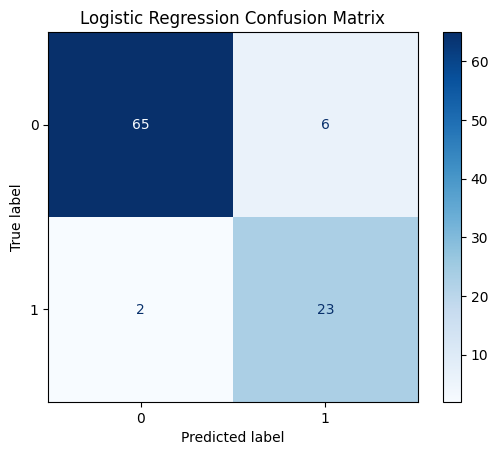


Decision Tree


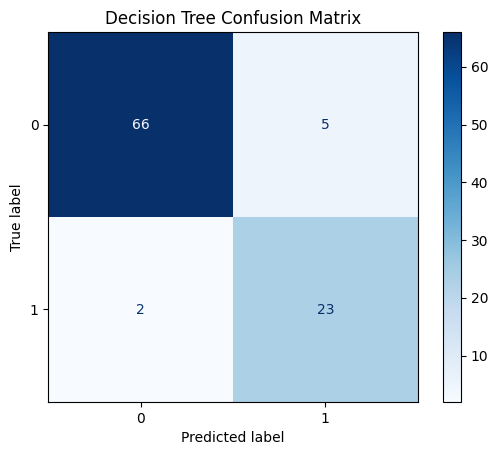


Random Forest


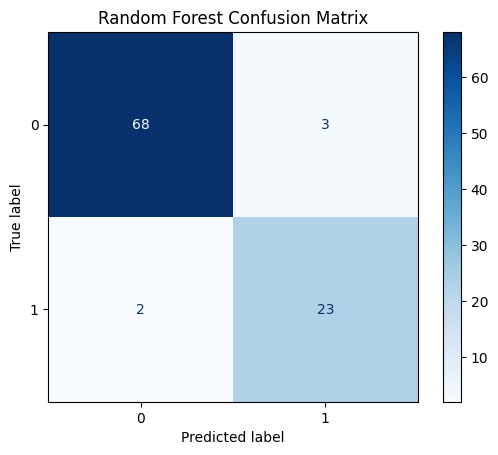


XGBoost


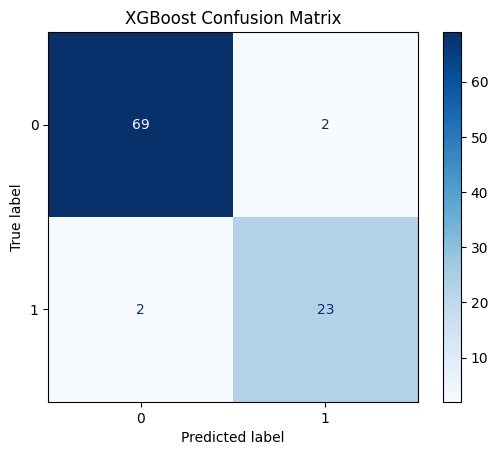

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
for name, pipe in pipelines.items():
    print(f"\n{name}")
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test,
                                                display_labels=[0, 1],
                                                cmap=plt.cm.Blues,
                                                normalize=None)
    disp.ax_.set_title(f"{name} Confusion Matrix")
    plt.show()


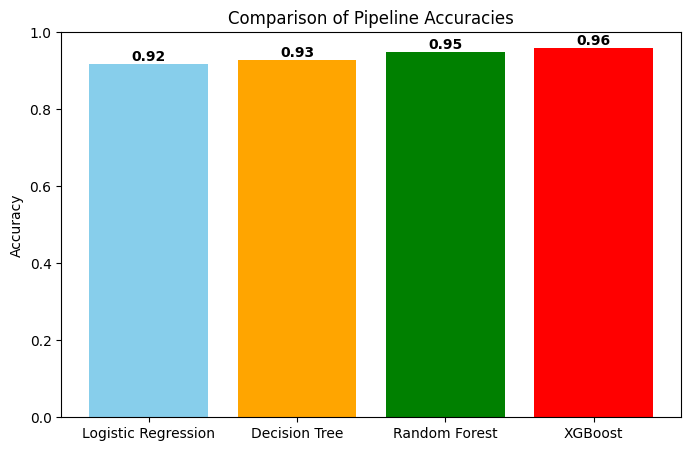

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(accuracy_dict.keys(), accuracy_dict.values(), color=['skyblue','orange','green','red'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Comparison of Pipeline Accuracies')
for i, v in enumerate(accuracy_dict.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


# conclusion

| Model               | Accuracy |
| ------------------- | -------- |
| Logistic Regression | 0.917    |
| Decision Tree       | 0.927    |
| Random Forest       | 0.948    |
| XGBoost             | 0.958    |


# **BEST** **MODEL**

XGBoost is best for detecting minority class without too many false positives.

Ensemble methods (Random Forest, XGBoost) consistently outperform single models.

In [ ]:
feature_names = xgb_pipeline.named_steps['preprocessing'].get_feature_names_out()
importances = xgb_pipeline.named_steps['model'].feature_importances_

importance = pd.DataFrame({
    'feature': feature_names,
    'impact': importances
}).sort_values(by='impact', ascending=False)

In [ ]:
feature_names = xgb_pipeline.named_steps['preprocessing'].get_feature_names_out()
importances = xgb_pipeline.named_steps['model'].feature_importances_

importance = pd.DataFrame({
    'feature': feature_names,
    'impact': importances
}).sort_values(by='impact', ascending=False)

importance.head(10)


,feature,impact
2,num__StudentAbsenceDays,0.211030
39,cat__GradeID_G-06,0.052674
0,num__engagement_score,0.047570
1,num__class_participation,0.045478
58,cat__Topic_Quran,0.036730
66,cat__ParentAnsweringSurvey_Yes,0.035144
51,cat__Topic_Chemistry,0.031532
65,cat__ParentAnsweringSurvey_No,0.030020
29,cat__PlaceofBirth_Tunis,0.027966
15,cat__NationalITy_Tunis,0.025329


save XGBoost as best model

In [ ]:
import joblib
joblib.dump(xgb_pipeline, 'xgboost_model.joblib')

['xgboost_model.joblib']

save preprocessing pipeline

In [ ]:
joblib.dump(preprocessor,'preprocessor.joblib')

['preprocessor.joblib']

load model and preprocessor

In [ ]:
xgb_pipeline = joblib.load("xgboost_model.joblib")
preprocessor = joblib.load("preprocessor.joblib")

prediction

In [ ]:
def predict_dropout(model, X):
    """
    Predict dropout with risk score and risk label.
    """
    # Keep student_id if exists, else create index
    if 'student_id' in X.columns:
        student_ids = X['student_id']
    else:
        student_ids = X.index

    # Derived features
    X['engagement_score'] = (
        X.get('raisedhands', 0) +
        X.get('VisITedResources', 0) +
        X.get('AnnouncementsView', 0) +
        X.get('Discussion', 0)
    )
    X['class_participation'] = X.get('raisedhands', 0) + X.get('VisITedResources', 0)

    # Map StudentAbsenceDays
    if X['StudentAbsenceDays'].dtype == object:
        X['StudentAbsenceDays'] = X['StudentAbsenceDays'].map({
            'Under-7': 0,
            'Above-7': 1
        })

    # Predict probability and binary class
    probs = model.predict_proba(X)[:, 1]  # probability of dropout
    preds = (probs >= 0.5).astype(int)

    # Risk label based on thresholds
    def risk_label(prob):
        if prob < 0.4:
            return "Low"
        elif prob < 0.7:
            return "Medium"
        else:
            return "High"

    labels = [risk_label(p) for p in probs]

    # Build output DataFrame
    out_df = pd.DataFrame({
        'student_id': student_ids,
        'risk_score': probs,
        'risk_label': labels,
        'predicted_dropout': preds
    })

    return out_df


In [ ]:
students_df = pd.DataFrame([
    {
        'student_id': 1,
        'gender': 'M',
        'NationalITy': 'KW',
        'PlaceofBirth': 'KuwaIT',
        'StageID': 'MiddleSchool',
        'GradeID': 'G-08',
        'SectionID': 'A',
        'Topic': 'Math',
        'Semester': 'F',
        'Relation': 'Father',
        'raisedhands': 10,
        'VisITedResources': 20,
        'AnnouncementsView': 5,
        'Discussion': 2,
        'ParentAnsweringSurvey': 'Yes',
        'ParentschoolSatisfaction': 'Bad',
        'StudentAbsenceDays': 'Above-7'
    },
    {
        'student_id': 2,
        'gender': 'F',
        'NationalITy': 'KW',
        'PlaceofBirth': 'KuwaIT',
        'StageID': 'MiddleSchool',
        'GradeID': 'G-07',
        'SectionID': 'B',
        'Topic': 'Science',
        'Semester': 'F',
        'Relation': 'Mother',
        'raisedhands': 5,
        'VisITedResources': 15,
        'AnnouncementsView': 3,
        'Discussion': 1,
        'ParentAnsweringSurvey': 'No',
        'ParentschoolSatisfaction': 'Good',
        'StudentAbsenceDays': 'Under-7'
    }
])


In [ ]:
results_df = predict_dropout(xgb_pipeline, students_df)
results_df.to_csv("predictions.csv", index=False)

print(results_df)

   student_id  risk_score risk_label  predicted_dropout
0           1    0.974249       High                  1
1           2    0.625073     Medium                  1


In [ ]:

def risk_label(score):
    if score >= 0.7:
        return "High"
    elif score >= 0.4:
        return "Medium"
    else:
        return "Low"

def predict_dropout_xgb(pipeline, X):
    if 'student_id' in X.columns:
        student_ids = X['student_id']
        X_raw = X.drop(columns=['student_id'])
    else:
        student_ids = X.index
        X_raw = X.copy()

    risk_scores = pipeline.predict_proba(X_raw)[:, 1]

    preds = pd.DataFrame({
        'student_id': student_ids,
        'risk_score': risk_scores,
        'risk_label': [risk_label(s) for s in risk_scores],
        'predicted_dropout': (risk_scores >= 0.5).astype(int)
    })

    return preds

# Usage:
predictions = predict_dropout_xgb(xgb_pipeline, X_test)
predictions.to_csv("student_dropout_predictions.csv", index=False)
print("CSV file created successfully!")

CSV file created successfully!


In [ ]:
df_predictions = pd.read_csv("student_dropout_predictions.csv")
df_predictions.head()  # Show first 5 rows

,student_id,risk_score,risk_label,predicted_dropout
0,168,0.024257,Low,0
1,165,0.000903,Low,0
2,96,0.027759,Low,0
3,467,0.000712,Low,0
4,464,0.006322,Low,0
